In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pxm
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
sns.set()
pd.pandas.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
data = pd.read_csv('hotel_bookings_cleaned.csv')

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


## For Data Exploratory Analysis I'll answer some questions.
1. What is the percentage of cancel and booked hotel bookings?<br>
2. How seasonal (monthly, daily) bookings vary?<br>
3. bookings distributed by country.<br>
4. Cancelled bookings.<br>
5. cancelled/booked bookings by markets segments.<br>
6. cancelled/booked bookings by distribution channel.<br>
7. Bookings cancelled by repeated or non repeated guests.<br>
8. Which room is the most allotted room for the booked bookings?<br>
9. Which customer visit the most?<br>
10. How many special request ask by different customers?<br>
11. How much client pay for a room per person per day?<br>
12. Which market segment pay the most?<br>
13. Seasonal hotels rates?<br>
14. How much customers pay for total stay.<br>
15. How many customers who came but didn't stay even for one day?<br>

### 1. What is the percentage of cancel and booked hotel bookings?

In [4]:
## getting cancelled and non cancelled data of each hotel

booking_ratio = pd.DataFrame(data.groupby(['is_canceled', 'hotel'])['is_canceled'].count())
booking_ratio.columns=['Bookings']
booking_ratio = booking_ratio.reset_index(level=[0,1])
booking_ratio['Percentage'] = round((booking_ratio['Bookings']/sum(booking_ratio['Bookings']))*100, 2)

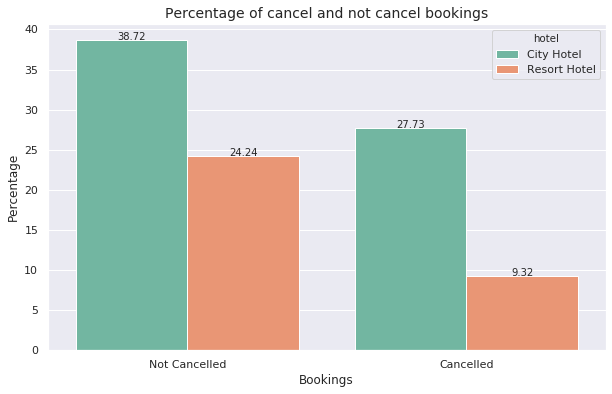

In [5]:
# ploting data bar chart

plt.figure(figsize=[10,6])
ax = sns.barplot(data=booking_ratio, x='is_canceled', y='Percentage', hue='hotel', palette="Set2")
plt.title('Percentage of cancel and not cancel bookings', fontsize=14)
plt.xlabel('Bookings')
plt.xticks([0,1], labels=['Not Cancelled', 'Cancelled'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}'.format((height/100)*100),
            ha="center")
plt.show()

Record showing that camcel rate bookings is less than booked. <br>
bars also telling us that city hotel have high cancel/not cancel bookings than resort hotel. It's mean that City hotel have more customers.<br>
Total 62.96‬% people didn't cancel bookings. 38% city and 24% resort hotel.<br>
37.05% people cancel their reservations. 27% city and 9% resort hotel.

### 2. How seasonal bookings vary?
Here we seasonal bookings

#### Yearly booked Bookings

In [6]:
# getting yearly non cancelled customer data

booked_reservations = pd.DataFrame(data.loc[data['is_canceled']==0].groupby(['arrival_date_year', 'hotel'])['is_canceled'].count())
booked_reservations.reset_index(level=[0,1], inplace=True)
booked_reservations['arrival_date_year'] = pd.to_datetime(booked_reservations['arrival_date_year'], format="%Y").dt.year
booked_reservations

,arrival_date_year,hotel,is_canceled
0,2015,City Hotel,7678
1,2015,Resort Hotel,6176
2,2016,City Hotel,22733
3,2016,Resort Hotel,13637
4,2017,City Hotel,15817
5,2017,Resort Hotel,9125


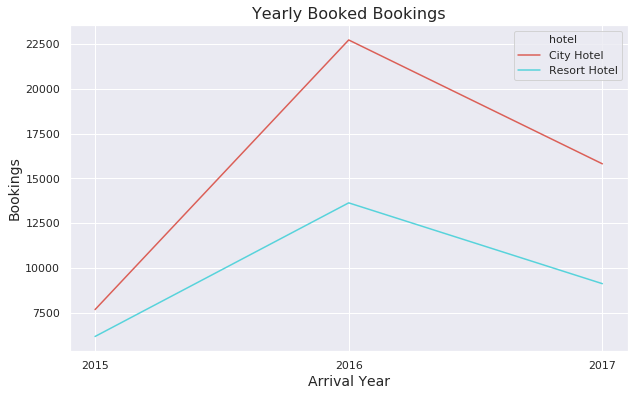

In [7]:
plt.figure(figsize=[10,6])
sns.lineplot(data=booked_reservations, x='arrival_date_year', y='is_canceled', hue='hotel', palette='hls')
plt.title('Yearly Booked Bookings', fontsize=16)
plt.xlabel('Arrival Year', fontsize=14)
plt.ylabel('Bookings', fontsize=14)
plt.xticks(np.arange(2015, 2018, step=1))
plt.show()

2016 year seems good for hotels. As they have highest sales then decreased afterwards.

#### Yearly Cancelled Bookings

In [8]:
# yearly cancelled data
cancelled = pd.DataFrame(data.loc[data['is_canceled'] == 1].groupby(['arrival_date_year', 'hotel'])['is_canceled'].count())
cancelled.reset_index(level=[0,1], inplace=True)
cancelled

,arrival_date_year,hotel,is_canceled
0,2015,City Hotel,6004
1,2015,Resort Hotel,2138
2,2016,City Hotel,15407
3,2016,Resort Hotel,4930
4,2017,City Hotel,11691
5,2017,Resort Hotel,4054


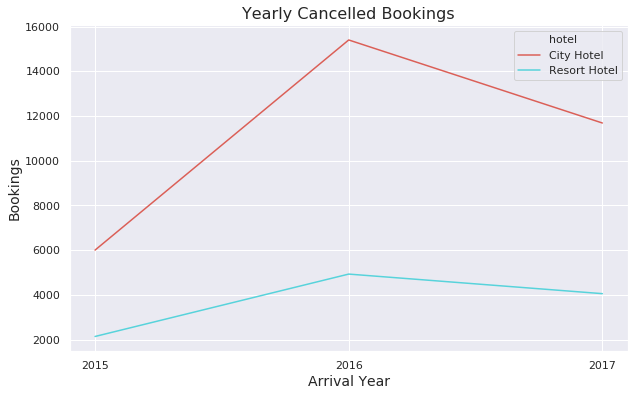

In [9]:
plt.figure(figsize=[10,6])
sns.lineplot(data=cancelled, x='arrival_date_year', y='is_canceled', hue='hotel', palette='hls')
plt.title('Yearly Cancelled Bookings', fontsize=16)
plt.xlabel('Arrival Year', fontsize=14)
plt.ylabel('Bookings', fontsize=14)
plt.xticks(np.arange(2015, 2018, step=1))
plt.show()

Cancelled bookings showing the same behavior as booked reservations but with different ratio.<br>
City hotel showing high difference of cancelled bookings between 2015 and 2016 as compared to resort hotel.

#### Monthly Bookings

In [10]:
month = ['January', 'February', 'March', 'April', 'May', 'June',
         'July', 'August', 'September', 'October', 'November', 'December']

In [11]:
#getting monthly data and rearranging months

monthly_bookings = pd.DataFrame(data.groupby(['is_canceled', 'arrival_date_month'])['is_canceled'].count())
monthly_bookings.columns=['Bookings']
monthly_bookings.reset_index(level=[0,1], inplace=True)
monthly_bookings['arrival_date_month'] = pd.Categorical(monthly_bookings['arrival_date_month'], categories=month, ordered=True)
canc = {0: 'Not Cancelled', 1:'Cancelled'}
monthly_bookings['is_canceled'] = monthly_bookings.replace({'is_canceled':canc})
monthly_bookings

,is_canceled,arrival_date_month,Bookings
0,Not Cancelled,April,6565
1,Not Cancelled,August,8638
2,Not Cancelled,December,4409
3,Not Cancelled,February,5372
4,Not Cancelled,January,4122
5,Not Cancelled,July,7919
6,Not Cancelled,June,6404
7,Not Cancelled,March,6645
8,Not Cancelled,May,7114
9,Not Cancelled,November,4672


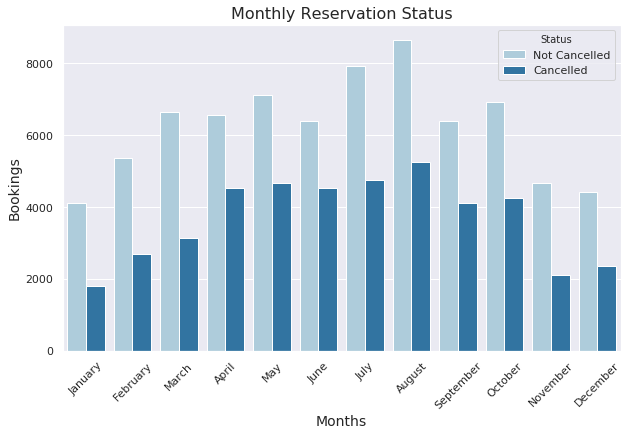

In [12]:
plt.figure(figsize=[10,6])
sns.barplot(data=monthly_bookings, x='arrival_date_month', y='Bookings', hue='is_canceled', palette='Paired')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.xlabel('Months', fontsize=14)
plt.ylabel('Bookings', fontsize=14)
plt.title('Monthly Reservation Status', fontsize=16)
plt.show()

Summer time is good for both hotels. July and August have highest reservation. That because of people travel more in summer. We also have high cancel bookings in summer.<br>
After August Bookings decreases and again start increasing from new year.<br>
#### Let's find bookings by hotel

In [13]:

monthly_hotel = pd.DataFrame(data.loc[data['is_canceled']==0].groupby(['hotel', 'arrival_date_month'])['is_canceled'].count())
monthly_hotel.columns=['Bookings']
monthly_hotel.reset_index(level=[0,1], inplace=True)
monthly_hotel['arrival_date_month'] = pd.Categorical(monthly_bookings['arrival_date_month'], categories=month, ordered=True)
monthly_hotel

,hotel,arrival_date_month,Bookings
0,City Hotel,April,4015
1,City Hotel,August,5381
2,City Hotel,December,2392
3,City Hotel,February,3064
4,City Hotel,January,2254
5,City Hotel,July,4782
6,City Hotel,June,4366
7,City Hotel,March,4072
8,City Hotel,May,4579
9,City Hotel,November,2696


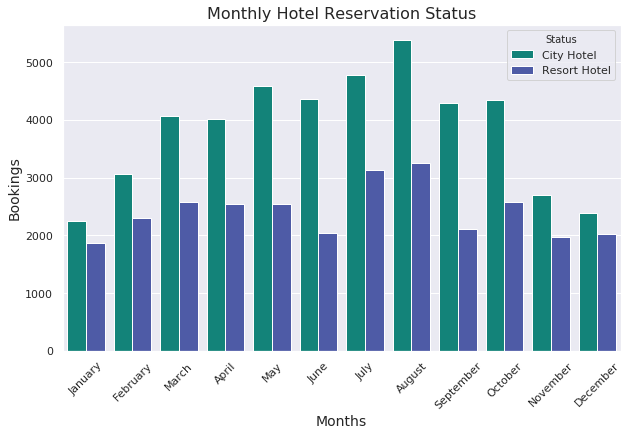

In [14]:
plt.figure(figsize=[10,6])
color = ["#009688", "#3F51B5"]
sns.barplot(data=monthly_hotel, x='arrival_date_month', y='Bookings', hue='hotel', palette=sns.color_palette(color))
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.xlabel('Months', fontsize=14)
plt.ylabel('Bookings', fontsize=14)
plt.title('Monthly Hotel Reservation Status', fontsize=16)
plt.show()

We are looking at the same as above situation here

#### Daily Bookings

In [15]:
daily_bookings = pd.DataFrame(data.groupby(['is_canceled', 'arrival_date_day_of_month'])['is_canceled'].count())
daily_bookings.columns=['Bookings']
daily_bookings.reset_index(level=[0,1], inplace=True)
canc = {0: 'Not Cancelled', 1:'Cancelled'}
daily_bookings['is_canceled'] = daily_bookings.replace({'is_canceled':canc})
daily_bookings.head()

,is_canceled,arrival_date_day_of_month,Bookings
0,Not Cancelled,1,2182
1,Not Cancelled,2,2670
2,Not Cancelled,3,2310
3,Not Cancelled,4,2412
4,Not Cancelled,5,2638


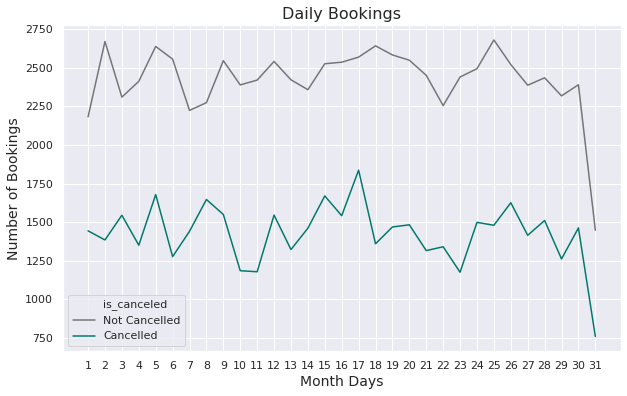

In [16]:
plt.figure(figsize=[10,6])
sns.lineplot(x='arrival_date_day_of_month', y='Bookings', data=daily_bookings, 
             hue='is_canceled', palette=sns.color_palette(['#757575', '#00796B']))
plt.xticks(np.arange(1, 32, step=1))
plt.xlabel('Month Days', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.title('Daily Bookings', fontsize=16)
plt.show()

Seems like each day bookings are different from another day.<br>
1. Booked Bookings:<br>
    1. In first 2 weeks after every 2 days bookings increasing or decreasing. <br>
    2. 3rd week showing some average bookings. <br>
    3. 4th week showing some interesting figures. Day 25 have high bookings then decreases. <br>
    4. day 31st showing lowest bookings of whole month. <br>
2. Cancel Bookings: <br>
    1. Booking cancelation slow in start of month.<br>
    2. Mid of every month large number of booking canceled by clients.<br>
    3. 31 day have lowest cancelations nearly 750.<br>
<br>
<p>I think the reason behind lowest canceled and booked bookings is people try to avoid travel on last day.</p>

#### Non cancelled daily bookings

In [17]:
# getting bookings those are not cancelled
daily_hotel = pd.DataFrame(data.loc[data['is_canceled']==0].groupby(['hotel', 'arrival_date_day_of_month'])['is_canceled'].count())
daily_hotel.columns=['Bookings']
daily_hotel.reset_index(level=[0,1], inplace=True)
daily_hotel.head()

,hotel,arrival_date_day_of_month,Bookings
0,City Hotel,1,1280
1,City Hotel,2,1648
2,City Hotel,3,1420
3,City Hotel,4,1470
4,City Hotel,5,1634


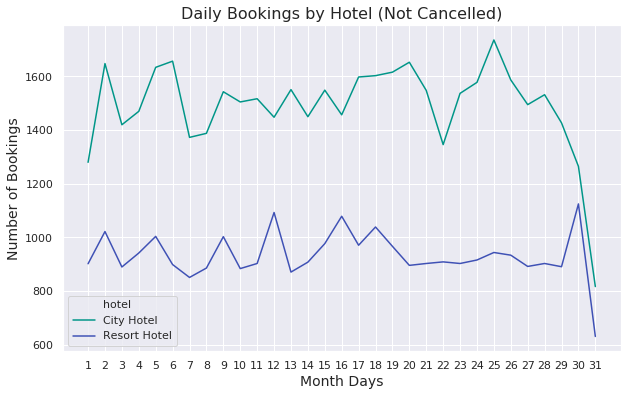

In [18]:
plt.figure(figsize=[10,6])
color = ["#009688", "#3F51B5"]
sns.lineplot(x='arrival_date_day_of_month', y='Bookings', data=daily_hotel, 
             hue='hotel', palette=sns.color_palette(color))
plt.xticks(np.arange(1, 32, step=1))
plt.xlabel('Month Days', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.title('Daily Bookings by Hotel (Not Cancelled)', fontsize=16)
plt.show()

1. City Hotel:<br>
    1. City hotel have bookings variation throughout the month. 2nd week showing average sales.<br> 
2. Resort Hotel:<br>
    1. Resort hotel showing variation in cancellation of bookings in first 3 weeks but 4th week have average rate of cancellation bookings. <br>
    2. 30th day of the month highest cancellations and 31st have lowest.

### 3. bookings distributed by country.

In [19]:
# country data
country_bookings = pd.DataFrame(data.loc[data['is_canceled'] == 0].groupby('country')['is_canceled'].count())
country_bookings['percentage'] = round((country_bookings['is_canceled']/sum(country_bookings['is_canceled'])*100),2)
country_bookings.reset_index(inplace=True)
country_bookings.head()

,country,is_canceled,percentage
0,ABW,2,0.00
1,AGO,157,0.21
2,AIA,1,0.00
3,ALB,10,0.01
4,AND,2,0.00


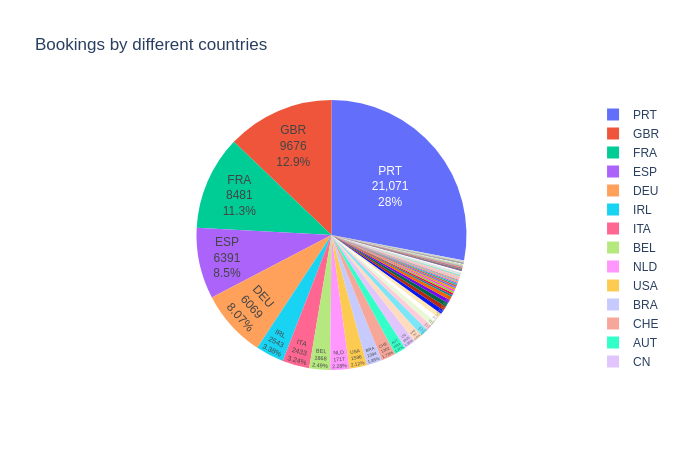

In [20]:
fig = pxm.pie(country_bookings, values='is_canceled', names='country', title='Bookings by different countries')
fig.update_traces(textposition='inside', textinfo='value+percent+label')
fig.show('png')

28% clients of hotels are from Portugal(PRT). follow by uk, france, spain. so the most of the clients are from Portugal, UK, France, Spain and Germany 69%. one more thing is 52% clients are from Portugal, UK and France.

### 4. How many cancelled bookings we have?

In [21]:
# cancelled booking data
cancel_bookings = pd.DataFrame(data.loc[data['is_canceled']== 1].groupby('hotel')['is_canceled'].count())
cancel_bookings.reset_index(inplace=True)
cancel_bookings.columns = ['Category', 'Cancelled Bookings']
cancel_bookings.loc[2] = ['Total cancel', sum(cancel_bookings['Cancelled Bookings'])]
cancel_bookings

,Category,Cancelled Bookings
0,City Hotel,33102
1,Resort Hotel,11122
2,Total cancel,44224


### 5. Cancelled/Booked bookings by markets segments.

In [22]:
market_segment_b = pd.DataFrame(data.loc[data['is_canceled'] == 0].groupby('market_segment')['is_canceled'].count())
market_segment_b.reset_index(inplace=True)
market_segment_b.columns=['Markets Segment', 'Booked Bookings']
market_segment_b
market_segment_c = pd.DataFrame(data.loc[data['is_canceled'] == 1].groupby('market_segment')['is_canceled'].count())
market_segment_c.reset_index(inplace=True)
market_segment_c.columns=['Markets Segment', 'Cancel Bookings']

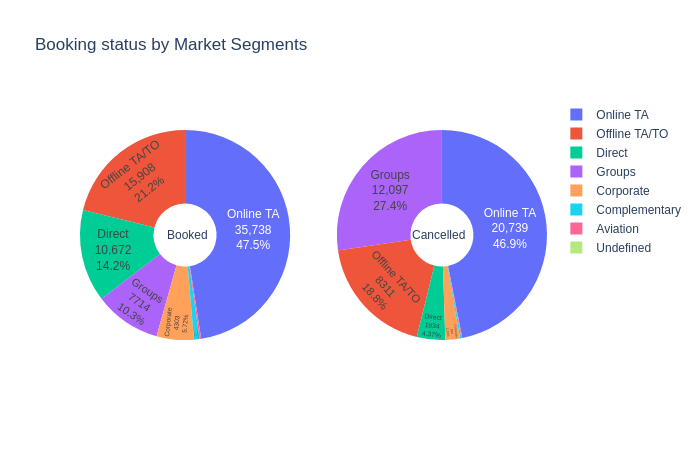

In [23]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(values=market_segment_b['Booked Bookings'],
                     labels=market_segment_b['Markets Segment'], name='Booked Bookings'), 1, 1)
fig.add_trace(go.Pie(values=market_segment_c['Cancel Bookings'], 
                    labels=market_segment_c['Markets Segment'], name='Cancel Bookings'), 1, 2)
fig.update_traces(hole=0.3, textposition='inside', 
                  textinfo='value+percent+label')
fig.update_layout(
    title_text="Booking status by Market Segments",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Booked', x=0.18, y=0.5, font_size=12, showarrow=False),
                 dict(text='Cancelled', x=0.83, y=0.5, font_size=12, showarrow=False)])
fig.show('png')

1. Online Tour agent market showing same ratio of cancel and booked bookings but largest booking client in entire market segments.<br>
2. Offline tour agents and tour operators 2nd highest number of clients in booked clients. But cancellation rate is 3rd highest. 2nd most bookings cancel by groups market.<br>
3. We can notice that Tour industry largest client of hotel (almost 69% booked and 66% cancelled)

### 6. Cancelled/Booked bookings by distribution channel.

In [24]:
distri_ch_b = pd.DataFrame(data.loc[data['is_canceled'] == 0].groupby('distribution_channel')['is_canceled'].count())
distri_ch_b.reset_index(inplace=True)
distri_ch_b.columns=['Markets Segment', 'Booked Bookings']
distri_ch_b
distri_ch_c = pd.DataFrame(data.loc[data['is_canceled'] == 1].groupby('distribution_channel')['is_canceled'].count())
distri_ch_c.reset_index(inplace=True)
distri_ch_c.columns=['Markets Segment', 'Cancel Bookings']

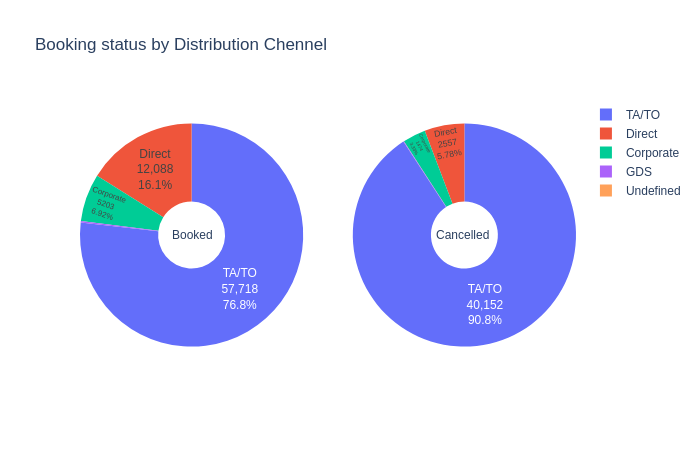

In [25]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(values=distri_ch_b['Booked Bookings'],
                     labels=distri_ch_b['Markets Segment'], name='Booked Bookings'), 1, 1)
fig.add_trace(go.Pie(values=distri_ch_c['Cancel Bookings'], 
                    labels=distri_ch_c['Markets Segment'], name='Cancel Bookings'), 1, 2)
fig.update_traces(hole=0.3, textposition='inside', 
                  textinfo='value+percent+label')
fig.update_layout(
    title_text="Booking status by Distribution Chennel",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Booked', x=0.18, y=0.5, font_size=12, showarrow=False),
                 dict(text='Cancelled', x=0.83, y=0.5, font_size=12, showarrow=False)])
fig.show('png')

This result pretty much expected because we have seen tour agents have highest market segment.

### 7. Bookings cancelled by repeated and non repeated guests.
first we find how many repeated clients we have.

In [26]:
# getting data of customers who come again and again
repeated = pd.DataFrame(data['is_repeated_guest'].value_counts())
repeated.columns=['Guests']
repeated['status'] = ['Non repeated', 'Repeated']
repeated

,Guests,status
0,115580,Non repeated
1,3810,Repeated


Let's find out cancelled bookings

In [27]:
cancel_by_repeated = pd.DataFrame(data.loc[data['is_canceled'] == 1].groupby(['is_repeated_guest', 'hotel'])['is_canceled'].count())
cancel_by_repeated.columns = ['Bookings']
cancel_by_repeated.reset_index(inplace=True)
cancel_by_repeated['is_repeated_guest'] = cancel_by_repeated.replace({'is_repeated_guest':{0: 'Not repeated', 1:'Repeated'}})
cancel_by_repeated

,is_repeated_guest,hotel,Bookings
0,Not repeated,City Hotel,32661
1,Not repeated,Resort Hotel,11011
2,Repeated,City Hotel,441
3,Repeated,Resort Hotel,111


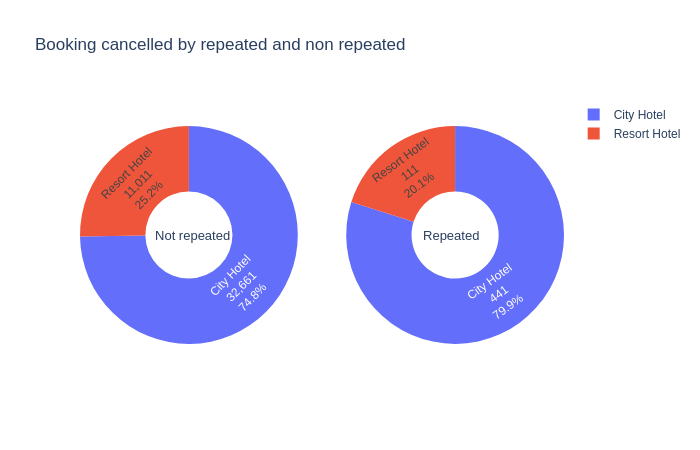

In [28]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(values=cancel_by_repeated[cancel_by_repeated['is_repeated_guest'] == 'Not repeated']['Bookings'],
                     labels=cancel_by_repeated[cancel_by_repeated['is_repeated_guest'] == 'Not repeated']['hotel'],
                     name='Not repeated'), 1, 1)
fig.add_trace(go.Pie(values=cancel_by_repeated[cancel_by_repeated['is_repeated_guest']== 'Repeated']['Bookings'], 
                    labels=cancel_by_repeated[cancel_by_repeated['is_repeated_guest'] == 'Repeated']['hotel'],
                     name='Repeated'), 1, 2)
fig.update_traces(hole=0.4, textposition='inside', 
                  textinfo='value+percent+label')
fig.update_layout(
    title_text="Booking cancelled by repeated and non repeated",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Not repeated', x=0.15, y=0.5, font_size=13, showarrow=False),
                 dict(text='Repeated', x=0.83, y=0.5, font_size=13, showarrow=False)])
fig.show('png')

Most of the bookings cancelled by non repeated clients and 74% of cancellation was city hotel.

### 8. Which room is the most allotted room for the booked bookings?

In [29]:
rooms = pd.DataFrame(data.loc[data['is_canceled']==0].groupby(['hotel', 
                                                               'assigned_room_type'])['is_canceled'].count())
rooms.reset_index(inplace=True)
rooms.columns = ['Hotel', 'Rooms', 'Bookings']
rooms.head()

,Hotel,Rooms,Bookings
0,City Hotel,A,30106
1,City Hotel,B,1501
2,City Hotel,C,146
3,City Hotel,D,10710
4,City Hotel,E,1628


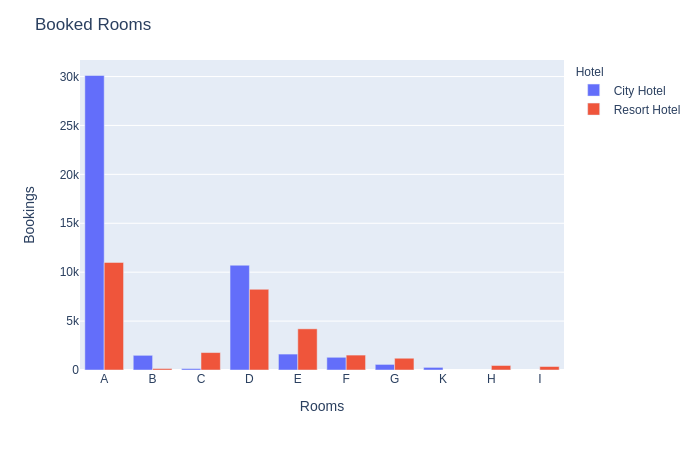

In [30]:
fig = pxm.bar(rooms, x="Rooms", y="Bookings", color='Hotel', barmode='group',
             height=400)
fig.update_layout(
    title_text="Booked Rooms")
fig.show('png')

Room A is most alloted room for bookings. <br>
One more thing we can notice some of rooms only present in city hotel and some of only in Resort hotel.

### 9. Which customer visit the most?

In [31]:
cus = pd.DataFrame(data[data['is_canceled']==0].groupby(['hotel', 'customer_type'])['customer_type'].count())
cus.columns = ['Bookings']
cus.reset_index(inplace=True)
cus

,hotel,customer_type,Bookings
0,City Hotel,Contract,1195
1,City Hotel,Group,264
2,City Hotel,Transient,32306
3,City Hotel,Transient-Party,12463
4,Resort Hotel,Contract,1619
5,Resort Hotel,Group,254
6,Resort Hotel,Transient,20793
7,Resort Hotel,Transient-Party,6272


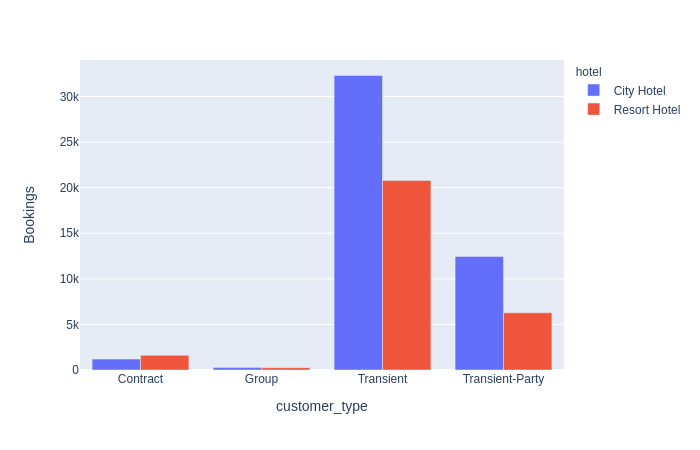

In [32]:
fig = pxm.bar(cus, x='customer_type', color='hotel', y='Bookings', barmode='group')
fig.show('png')

Transient customers are the most visited customers.

### 10. How many special request ask by different customers?

In [33]:
req = pd.DataFrame(data.loc[data['is_canceled'] == 0].groupby(['hotel',
                                                  'customer_type'])['total_of_special_requests'].sum())
req.reset_index(inplace=True)
req

,hotel,customer_type,total_of_special_requests
0,City Hotel,Contract,1589
1,City Hotel,Group,190
2,City Hotel,Transient,27478
3,City Hotel,Transient-Party,5002
4,Resort Hotel,Contract,826
5,Resort Hotel,Group,163
6,Resort Hotel,Transient,15676
7,Resort Hotel,Transient-Party,2749


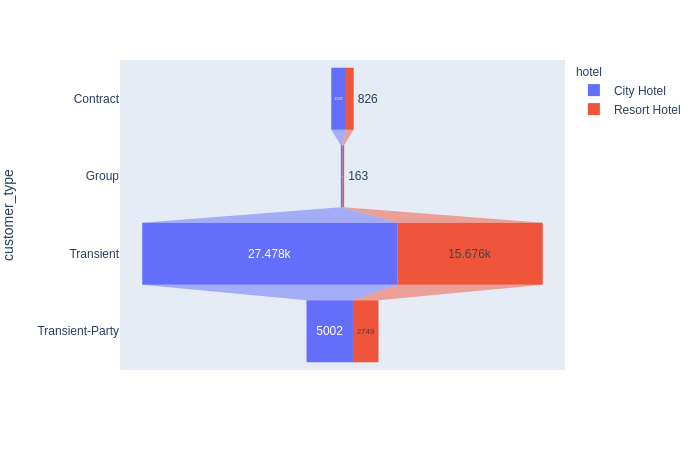

In [34]:
fig = pxm.funnel(req, x='total_of_special_requests', y='customer_type', color='hotel')
fig.show('png')

Transient clients made the largest number number special requests 27.4k for city hotel and 15.6k for resort hotel.<br>
Group people have lowest request 190 for city and 163 for resort hotel.

### 11. How much client pay for a room per person per day.

In [35]:
guest_data = data.loc[data['is_canceled']==0]
mask = ((guest_data['adults'] != 0) & (guest_data['children'] !=0))
guest_data_valid = guest_data[mask]
guest_data['adr_pp'] = guest_data['adr']
guest_data.loc[mask, 'adr_pp'] = guest_data_valid['adr'] / (guest_data_valid['adults'] + guest_data_valid['children'])
guest_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,98.0


In [36]:
payement_pp = guest_data[['hotel','assigned_room_type', 'adr_pp']].sort_values('assigned_room_type')
payement_pp.head()

,hotel,assigned_room_type,adr_pp
80541,City Hotel,A,68.85
89164,City Hotel,A,95.00
89168,City Hotel,A,126.90
89169,City Hotel,A,66.88
89170,City Hotel,A,76.16


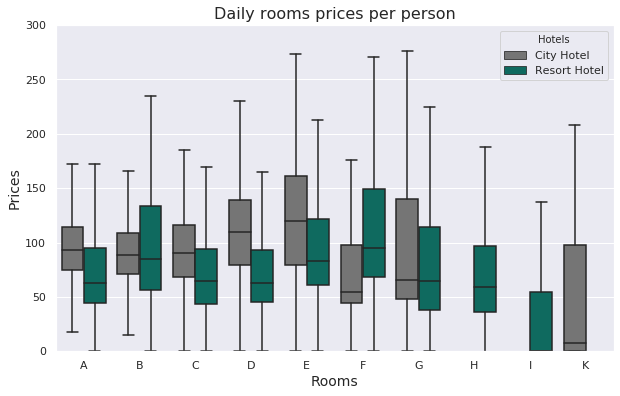

In [37]:
plt.figure(figsize=[10,6])
sns.boxplot(data=payement_pp, x='assigned_room_type', y='adr_pp', hue='hotel', 
            palette=sns.color_palette(['#757575', '#00796B']), fliersize=0)
plt.title('Daily rooms prices per person', fontsize=16)
plt.ylim(0, 300)
plt.legend(loc='upper right', title='Hotels')
plt.xlabel('Rooms', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.show()

First thing we can notice that there are some rooms which are only present in one hotel. e.g Room k is only present in city hotel and rooms h, i are only present in resort hotel.<br>
Data showing that having same name rooms wouldn't mean rooms will have same price rates.<br>
Average price of each room is less than 130 Euro. Here price unit not available i'm considering it in Euros.

### 12. Which market segment pay the most?

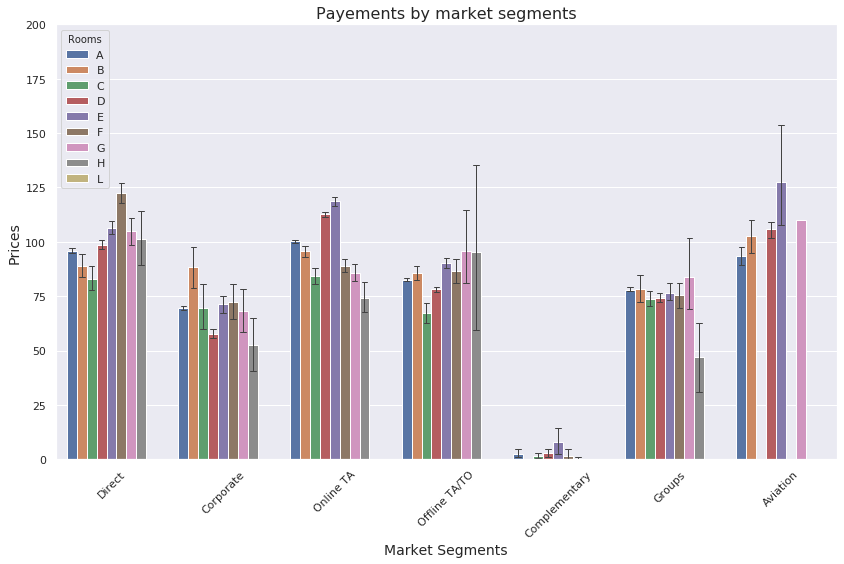

In [38]:
plt.figure(figsize=[14, 8])
sns.barplot(data=guest_data, x='market_segment', y='adr_pp', hue='assigned_room_type', hue_order=['A', 'B', 'C',  'D', 
                                                                                                  'E','F', 'G',  'H', 'L'],
           errwidth=1, capsize=0.05)
plt.title('Payements by market segments', fontsize=16)
plt.xlabel('Market Segments', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.legend(loc='upper left', title='Rooms')
plt.ylim(0,200)
plt.xticks(rotation=45)
plt.show()

Results are pretty interesting. Complementary showing lowest payments that make sense because 3rd least bookings made by them.<br>
But interesting thing is Aviation have lower bookings than complementary but have highest payements in entir market segment.<br>
#### What would be the reason let's findout.

For that we will stats of price per person, lead time and adults of air aviation.

In [39]:
air_aviation = guest_data.loc[guest_data['market_segment'] == 'Aviation'][['adr_pp','lead_time', 'adults']].describe()

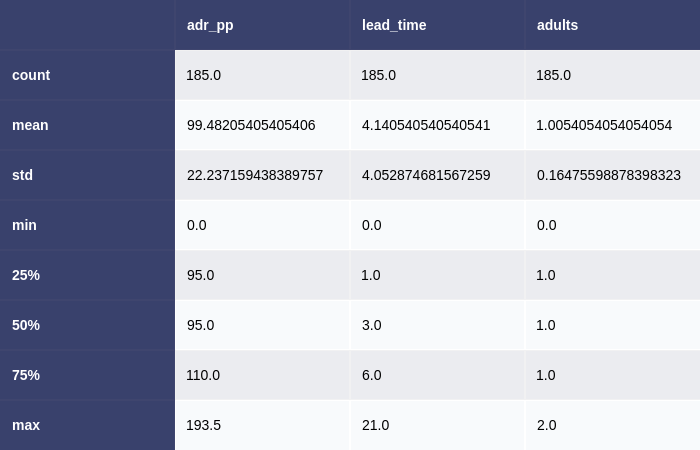

In [40]:
fig = ff.create_table(air_aviation, index=True)
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 14
fig.show('png')

For non air aviation

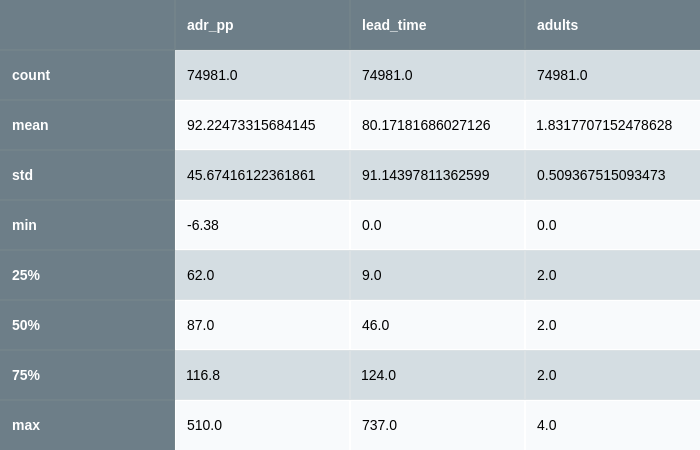

In [41]:
non_air_aviation = guest_data.loc[guest_data['market_segment'] != 'Aviation'][['adr_pp','lead_time', 'adults']].describe()
fig = ff.create_table(non_air_aviation, index=True, colorscale=[[0, '#455A64'],[.5, '#CFD8DC'],[1, '#FFFFFF']])
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 14
fig.show('png')

So, the reason behind high payements of air aviation is because of having low lead time and one room per person. <br>
This means that air aviation books reservation at last time for his crew which make them to pay high.

In [42]:
data_pp = data.copy()
mask = ((data_pp['adults'] != 0) & (data_pp['children'] !=0))
data_pp_valid = data_pp[mask]
data_pp['adr_pp'] = data_pp['adr']
data_pp.loc[mask, 'adr_pp'] = data_pp_valid['adr'] / (data_pp_valid['adults'] + data_pp_valid['children'])
data_pp.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,98.0


### 13. Seasonal hotels rates?

#### Yearly

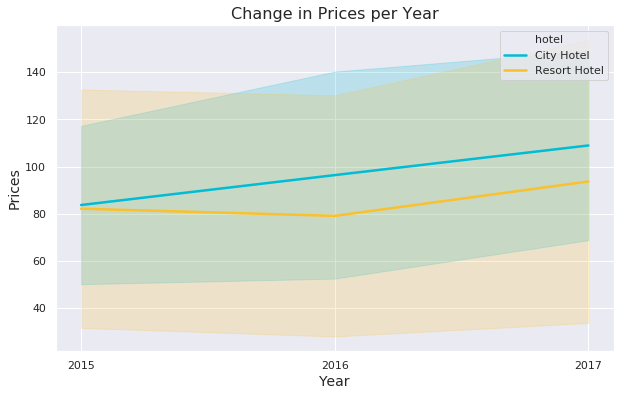

In [43]:
plt.figure(figsize=[10,6])
sns.lineplot(data=data_pp, x='arrival_date_year', y='adr_pp', hue='hotel', hue_order=['City Hotel', 'Resort Hotel'], 
             ci ='sd', size='hotel',sizes=(2.5, 2.5), palette=sns.color_palette(['#00BCD4', '#FBC02D']))
plt.xticks(np.arange(2015, 2017.1, step=1))
plt.title('Change in Prices per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.show()

City Hotel prices increasing every year but resort hotel lower their prices 1st (2016) year afterwards they start increasing again.

#### Monthly

In [44]:
monthly_rates = data_pp[['hotel', 'arrival_date_month', 'adr_pp']].sort_values('arrival_date_month')
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
monthly_rates['arrival_date_month'] = pd.Categorical(monthly_rates['arrival_date_month'], categories=ordered_months, ordered=True)

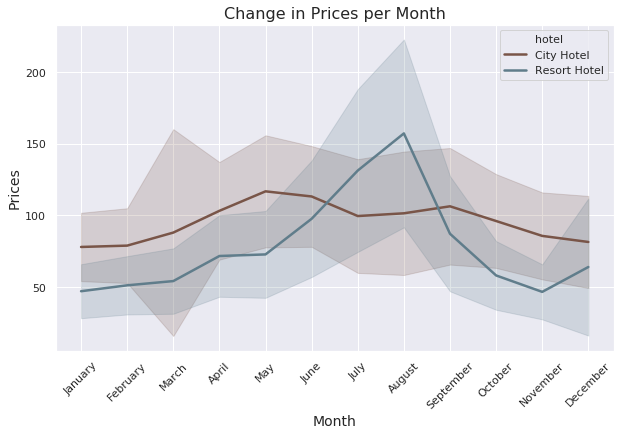

In [45]:
plt.figure(figsize=[10,6])
sns.lineplot(data=monthly_rates, x='arrival_date_month', y='adr_pp', hue='hotel', ci='sd', 
             size='hotel',sizes=(2.5, 2.5), palette=sns.color_palette(['#795548', '#607D8B']))
plt.title('Change in Prices per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Start and end of year have low rates. It's means that In winter both hotel lower their prices and increase in summer.<br>
City hotel highest rates in May and June. Resort hotel peak in August showing highest rates in August.

#### Daily

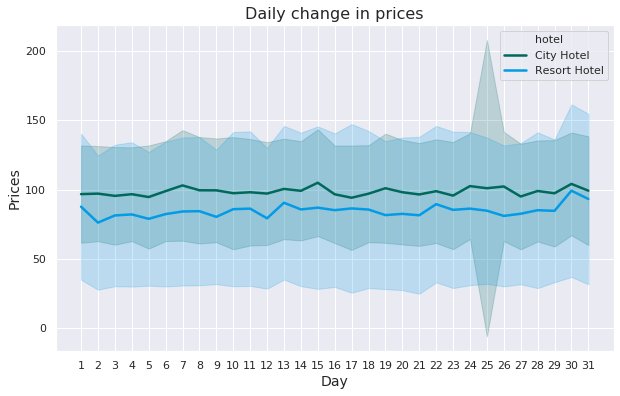

In [46]:
plt.figure(figsize=[10,6])
sns.lineplot(data=data_pp, x='arrival_date_day_of_month', y='adr_pp', hue='hotel', hue_order=['City Hotel', 'Resort Hotel'], 
             ci ='sd', size='hotel',sizes=(2.5, 2.5), palette=sns.color_palette(['#00695c', '#039be5']))
plt.xticks(np.arange(1, 32, step=1))
plt.title('Daily change in prices', fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.show()

There is not much a difference in prices on daily basis.
Resort hotel showing little increase in rates in start and end of month.

### 14. How much customers pay for total stay.

In [47]:
total_stay = guest_data[['hotel', 'adr_pp']]
total_stay['total stay'] = guest_data['stays_in_week_nights'] + guest_data['stays_in_weekend_nights']
total_stay['total_payement'] = total_stay['total stay'] * total_stay['adr_pp']
total_stay.head()

,hotel,adr_pp,total stay,total_payement
0,Resort Hotel,0.0,0,0.0
1,Resort Hotel,0.0,0,0.0
2,Resort Hotel,75.0,1,75.0
3,Resort Hotel,75.0,1,75.0
4,Resort Hotel,98.0,2,196.0


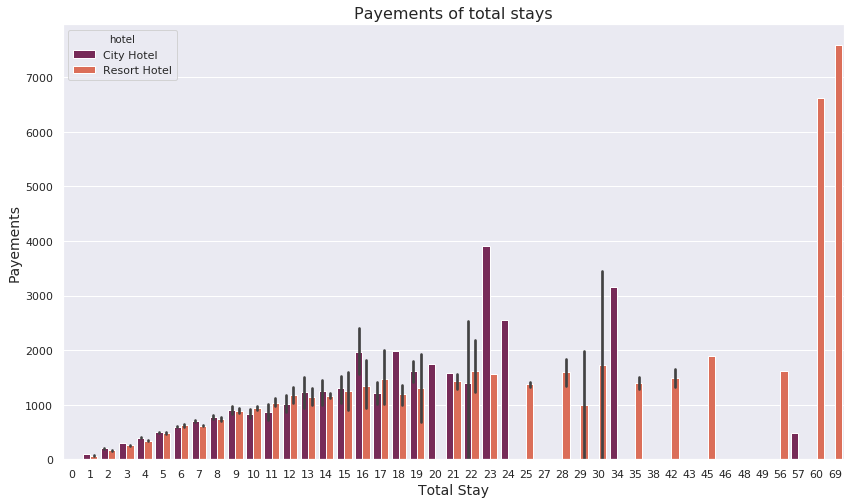

In [48]:
plt.figure(figsize=[14,8])
sns.barplot(data=total_stay, x='total stay', y='total_payement', hue='hotel', hue_order=['City Hotel', 'Resort Hotel'], 
            palette='rocket')
plt.xlabel('Total Stay', fontsize=14)
plt.ylabel('Payements', fontsize=14)
plt.title('Payements of total stays', fontsize=16)
plt.show()

We are some missing bar on some days this means that no one stayed that long in that hotel.<br>
City hotel have high prices than resort hotel inspite of that have same number of stayed.

### 15. How many customers who came but didn't stay even for one day?

In [49]:
non_stay = guest_data.loc[(guest_data['stays_in_week_nights'] == 0) & (guest_data['stays_in_weekend_nights'] == 0)].groupby('hotel')['is_canceled'].count()
non_stay = pd.DataFrame(non_stay)
non_stay.columns = ['Bookings']
non_stay.reset_index(inplace=True)
non_stay

,hotel,Bookings
0,City Hotel,308
1,Resort Hotel,372


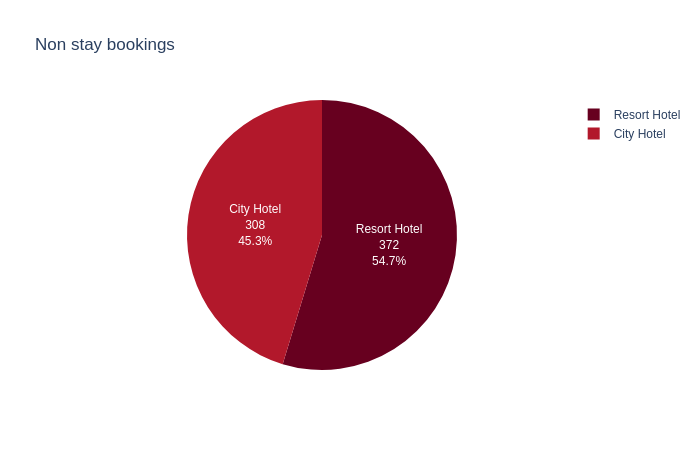

In [50]:
fig = pxm.pie(non_stay, values='Bookings', names='hotel', color_discrete_sequence=pxm.colors.sequential.RdBu,
             title='Non stay bookings')
fig.update_traces(textposition='inside', textinfo='value+percent+label')
fig.show('png')